# Literature module

This module as the name suggests is interested in the papers. There are 2 classes, LitSearch for searching pubmed and arxiv and Paper for using the found ids in LitSearch or from other resources (see apis) and look for papers and process them in a machine readable way. We will dive into these one by one

## LitSearch


In [1]:
from ccm_benchmate.literature.literature import LitSearch

search = LitSearch()

/home/alper/miniconda3/envs/ccm_demo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# can search arxiv, and choose to return dois instead of pmids, a little shameless self promotion
results=search.search('High-resolution profiling of NMD targets in yeast reveals', database="pubmed", max_results=10)

In [3]:
results

['28209632']

That was easy, now get some more information about these papers.

In [4]:
from ccm_benchmate.literature.literature import Paper
paper=Paper(paper_id=results[0])

In [5]:
paper.paper_info

{'id': 'https://openalex.org/W2587817388',
 'doi': 'https://doi.org/10.1261/rna.060541.116',
 'title': 'High-resolution profiling of NMD targets in yeast reveals translational fidelity as a basis for substrate selection',
 'topics': [{'id': 'https://openalex.org/T10521',
   'display_name': 'RNA and protein synthesis mechanisms',
   'score': 0.9991,
   'subfield': {'id': 'https://openalex.org/subfields/1312',
    'display_name': 'Molecular Biology'},
   'field': {'id': 'https://openalex.org/fields/13',
    'display_name': 'Biochemistry, Genetics and Molecular Biology'},
   'domain': {'id': 'https://openalex.org/domains/1',
    'display_name': 'Life Sciences'}},
  {'id': 'https://openalex.org/T10044',
   'display_name': 'Protein Structure and Dynamics',
   'score': 0.9965,
   'subfield': {'id': 'https://openalex.org/subfields/1312',
    'display_name': 'Molecular Biology'},
   'field': {'id': 'https://openalex.org/fields/13',
    'display_name': 'Biochemistry, Genetics and Molecular Biol

We can see quite a bit of information including related works, fileds that are mentioned, and works that are refernced. I am using a service called openalex because I do not have UofT credential so I cannot use pubmed api to get the results I need. One downside of this is that sometimes papers can be too new and not yet indexed by openalex. There is usually couple of weeks delay.

We can also got some more information about this paper this time searching pubmed

In [6]:
paper.abstract

'Nonsense-mediated mRNA decay (NMD) plays an important role in eukaryotic gene expression, yet the scope and the defining features of NMD-targeted transcripts remain elusive. To address these issues, we reevaluated the genome-wide expression of annotated transcripts in yeast cells harboring deletions of the UPF1, UPF2, or UPF3 genes. Our new RNA-seq analyses confirm previous results of microarray studies, but also uncover hundreds of new NMD-regulated transcripts that had escaped previous detection, including many intron-containing pre-mRNAs and several noncoding RNAs. The vast majority of NMD-regulated transcripts are normal-looking protein-coding mRNAs. Our bioinformatics analyses reveal that this set of NMD-regulated transcripts generally have lower translational efficiency and higher ratios of out-of-frame translation. NMD-regulated transcripts also have lower average codon optimality scores and higher transition probability to nonoptimal codons. Collectively, our results generate 

In [7]:
paper.download(destination=".") #folder name not name of the pdf, that will be the paper id

'/home/alper/Documents/packages/ccm_benchmate/notebooks/28209632.pdf'

Ok now this is the fun part, if you want you can take a look at the paper. There is nothing fancy there, but I wanted to select a paper that has some computational stuff as well as some wetlab experiments.

We are going to do the following:
1. Extract paper text from the pdf
2. Extract tables and figure as images
3. Generate auto interpretation of the figures and tables using a vision language model

For some weird reason even though the variables are set during installation this jupyter notebook cannot see them. So I will need to set one environmental variable before we move on

In [8]:
%env TESSDATA_PREFIX=/home/alper/miniconda3/envs/ccm_demo/share/tessdata/


env: TESSDATA_PREFIX=/home/alper/miniconda3/envs/ccm_demo/share/tessdata/


In [9]:
paper.process('/home/alper/Documents/packages/ccm_benchmate/notebooks/28209632.pdf')

/home/alper/miniconda3/envs/ccm_demo/lib/python3.10/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Loading checkpoint shards: 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]
Some parameters are on the meta device because they were offloaded to the cpu.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Depending on your setup, this might take a minute or two. We are doing a lot here. As you can see if the models are not already installed they will be installed automatically. To process them in a timely manner I highly suggest that you use a GPU to parse all the results. I ran this on a single RTX30380Ti with 16GB or VRAM and that was barely enough for one paper. Keep in mind that you are not supposed to do this interactively, instead you are supposed to offload this to a script and come back when all of this is done a few hours later.

In [12]:
paper.text

'Downloaded from majournal.cship.org on June 19, 2025 . Published by Cold Spring Harbor Laboratory Press High-resolution profiling of NMD targets in yeast reveals translational fidelity as a basis for substrate selection ALPER CELIK, RICHARD BAKER, FENG HE, and ALLAN JACOBSON Department of Microbiology and Physiological Systems, University of Massachusetts Medical School, Worcester, Massachusetts 01655, USA ABSTRACT Nonsense-mediated mRNA decay (NMD) plays an important role in eukaryotic gene expression, yet the scope and the defining features of NMD-targeted transcripts remain elusive. To address these issues, we reevaluated the genome-wide expression of annotated transcripts in yeast cells harboring deletions of the UPF1, UPF2, or UPF3 genes. Our new RNA-seq analyses confirm previous results of microarray studies, but also uncover hundreds of new NMD-regulated transcripts that had escaped previous detection, including many intron-containing pre-mRNAs and several noncoding RNAs. The v

In [13]:
len(paper.figures)

7

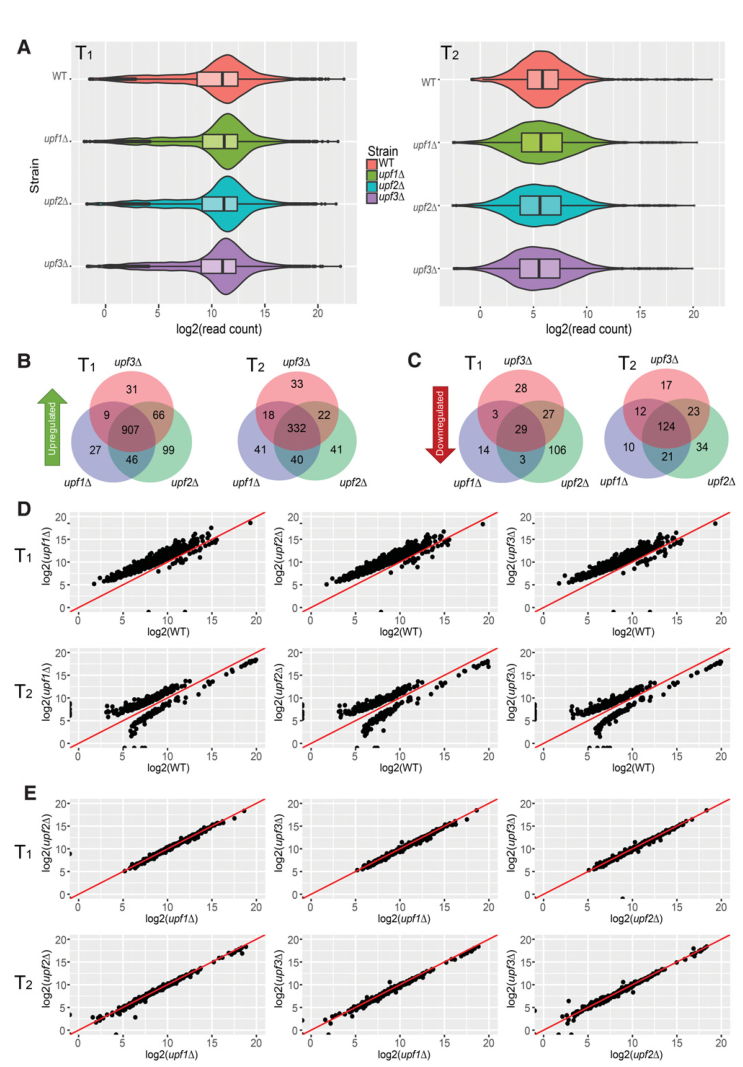

In [14]:
paper.figures[0]

In [15]:
paper.figure_interpretation[0]

['**Figure A:** This figure shows the distribution of read counts for different strains (WT, upf1Δ, upf2Δ, and upf3Δ) across two time points (T1 and T2). The violin plots indicate the density of read counts, with the box plots showing the median, interquartile range, and outliers. The distributions appear to be right-skewed, suggesting higher variability in read counts.\n\n**Figure B:** This Venn diagram compares the number of genes upregulated (left) and downregulated (right) in the upf3Δ strain relative to WT at both time points (T1 and T2). The overlap between the sets indicates genes that are consistently affected by the upf3Δ mutation across both time points.\n\n**Figure C:** Similar to Figure B, this Venn diagram shows the number of genes upregulated (left) and downregulated (right) in the upf2Δ strain relative to WT at both time points (T1 and T2).\n\n**Figure D & E:** These scatter plots compare the log2-transformed read counts of the upf1Δ, upf2Δ, and upf3Δ strains against the

I mean, I wrote this paper, I agree wholeheartedly, the only thing it got wrong is the T (which is understandable, it is supposed to be a different transcriptome, different annotations). I also would not read too much into whether upf3 deletion was the strongest one (it's not, if anything it's upf2). Keep in mind that this interpretaion is done w/o a caption.

Let's look at another figure

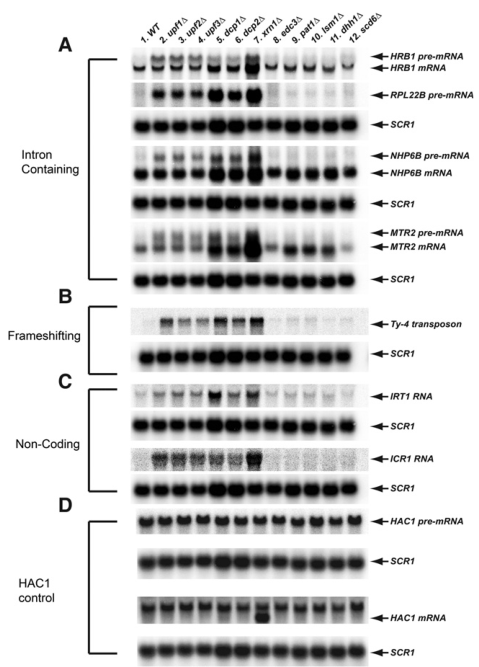

In [16]:
paper.figures[1]

In [17]:
paper.figure_interpretation[1]

['The figure presents results from Northern blot analysis comparing RNA levels in wild-type (WT) yeast strains and various mutant strains. The blots are divided into four categories: intron-containing, frameshifting, non-coding, and HAC1 control.\n\n**A. Intron-Containing:** This section shows the expression of pre-mRNA and mature mRNA for genes containing introns, such as HRB1, RPL22B, NHP6B, and MTR2. The presence of bands corresponding to pre-mRNA and mature mRNA indicates successful splicing in the WT strain but varying degrees of splicing defects in the mutant strains.\n\n**B. Frameshifting:** This section focuses on the expression of Ty-4 transposon RNA, which is known to undergo frameshifting. The bands suggest that frameshifting is affected differently in the mutant strains compared to the WT.\n\n**C. Non-Coding:** This section examines the expression of IRT1 and ICR1 RNAs, which are non-coding RNAs. The consistent band intensity across all strains suggests that these non-codin

In [18]:
len(paper.tables)

1

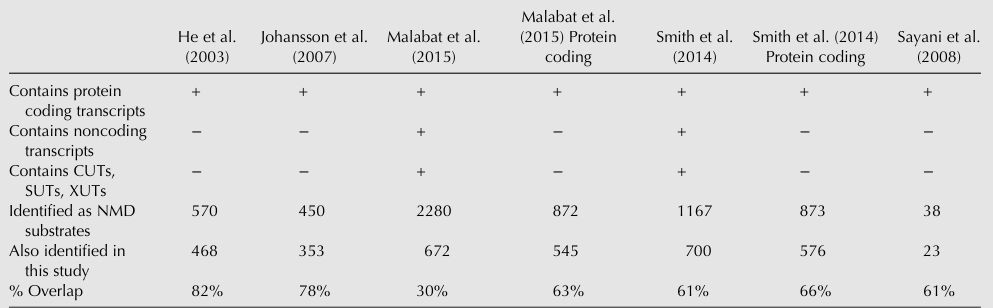

In [19]:
paper.tables[0]

In [20]:
paper.table_interpretation[0]

['The table compares various studies on noncoding RNA (ncRNA) and protein-coding transcripts, focusing on their overlap in identifying NMD substrates. The studies include He et al. (2003), Johansson et al. (2007), Malabat et al. (2015), Smith et al. (2014), and Sayani et al. (2008). \n\n- All studies except Johansson et al. (2007) and Malabat et al. (2015) contain protein-coding transcripts.\n- Only Malabat et al. (2015) contains noncoding transcripts.\n- Malabat et al. (2015) and Smith et al. (2014) identify CUTs, SUTs, and XUTs.\n- The number of identified NMD substrates varies significantly across studies: 570 by He et al., 450 by Johansson et al., 2280 by Malabat et al., 872 by Smith et al. (2015 Protein coding), 1167 by Smith et al. (2014), 873 by Smith et al. (2014 Protein coding), and 38 by Sayani et al.\n- The overlap in NMD substrates identified between studies ranges from 30% to 82%, with the highest overlap being between He et al. and Johansson et al.\n\nOverall, the table h

You can see what models and setting are being used under the `ccm_benchmate.literature.configs.py` file. You can change the models you want to use to something bigger or smaller. We are also working on adding the option to use models that can be access via an api. This can be a remote model like chatgpt or gemini but can also be a local(-ish) model that is served via ollama or llama.ccp.

Additionally, we are working on standardizin model calling and prompting using the openai python package. (this does not mean that the data is going to openai servers, it's just a python package thay they developed to standardize generative model calling and prompting).